# Analyzing a resonator
### Prerequisite
A working local installation of Ansys

### Resonator only: render into Ansys.
1. Run finite element eigenmode analysis. <br>
1. Plot fields and display them. <br>
1. Calculate EPR of substrate.  <br>

In [1]:
%load_ext autoreload
%autoreload 2

import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, Headings
import pyEPR as epr

In [2]:
%metal_heading Create a resonator 

### Create the design in Metal
Setup a design of a given dimension. Dimensions will be respected in the design rendering. <br>
Note that the design size extends from the origin into the first quadrant. Origin is the center of the chip.

In [3]:
design = designs.DesignPlanar({}, True)
design.chips.main.size['size_x'] = '2mm'
design.chips.main.size['size_y'] = '2mm'
hfss = design.renderers.hfss

gui = MetalGUI(design)

Create a readout resonator. Here, we define one end of the resonator as a short and the other end as an open. 

In [4]:
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.terminations.open_to_ground import OpenToGround
from qiskit_metal.qlibrary.terminations.short_to_ground import ShortToGround

design.delete_all_components()

otg = OpenToGround(design, 'open_to_ground', options=dict(pos_x='1.25mm',  pos_y='0um', orientation='0'))
stg = ShortToGround(design, 'short_to_ground', options=dict(pos_x='-1.25mm',  pos_y='0um', orientation='180'))
rt_meander = RouteMeander(design, 'readout',  Dict(
        total_length='6 mm',
        hfss_wire_bonds = True,
        fillet='90 um',
        lead = dict(start_straight='100um'),
        pin_inputs=Dict(
            start_pin=Dict(component='short_to_ground', pin='short'),
            end_pin=Dict(component='open_to_ground', pin='open')), ))

gui.rebuild()
gui.autoscale()

### Establish a connection between Metal and Ansys
First we will need to open Ansys. <br>
This can be done manually, or by executing one of the lines in the following cell. <br>
open_ansys() will look by default for the 2021 R2 version of Ansys. You can easily reroute it to your Ansys of choice by providing the name of the environment variable that contains the path (path_env) or the path itself (path)

In [5]:
hfss.open_ansys()   # this opens Ansys 2021 R2 if present
# hfss.open_ansys(path_var='ANSYSEM_ROOT211')
# hfss.open_ansys(path='C:\Program Files\AnsysEM\AnsysEM21.1\Win64')
# hfss.open_ansys(path='../../../Program Files/AnsysEM/AnsysEM21.1/Win64')

If a project was not automatically opened, we can manually create/open a project using the Ansys GUI. Alternatively, the following cell may be executed.

In [6]:
# hfss.new_ansys_project()

Finally, this Jupyter Notebook session is connected with the active Ansys project.

In [7]:
hfss.connect_ansys()
# hfss.connect_ansys('C:\\project_path\\', 'Project1')  # will open a saved project before linking the Jupyter session

INFO 01:40PM [connect_project]: Connecting to Ansys Desktop API...
INFO 01:40PM [load_ansys_project]: 	Opened Ansys App
INFO 01:40PM [load_ansys_project]: 	Opened Ansys Desktop v2020.2.0
INFO 01:40PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Ansoft/
	Project:   Project16
INFO 01:40PM [connect_design]: No active design found (or error getting active design).
INFO 01:40PM [connect]: 	 Connected to project "Project16". No design detected


### Prepare and run the analysis

Create and activate an eigenmode design called "Readout".

In [8]:
hfss.activate_eigenmode_design("Readout")

01:40PM 56s WARNING [activate_eigenmode_design]: The name=Readout was not in active project.  A new design will be inserted to the project.  Names in active project are: 
[].  
INFO 01:41PM [connect_design]: 	Opened active design
	Design:    Readout [Solution type: Eigenmode]
WARNING 01:41PM [connect_setup]: 	No design setup detected.
WARNING 01:41PM [connect_setup]: 	Creating eigenmode default setup.
INFO 01:41PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


Render the resonator called readout in Metal, to "Readout" design in Ansys.

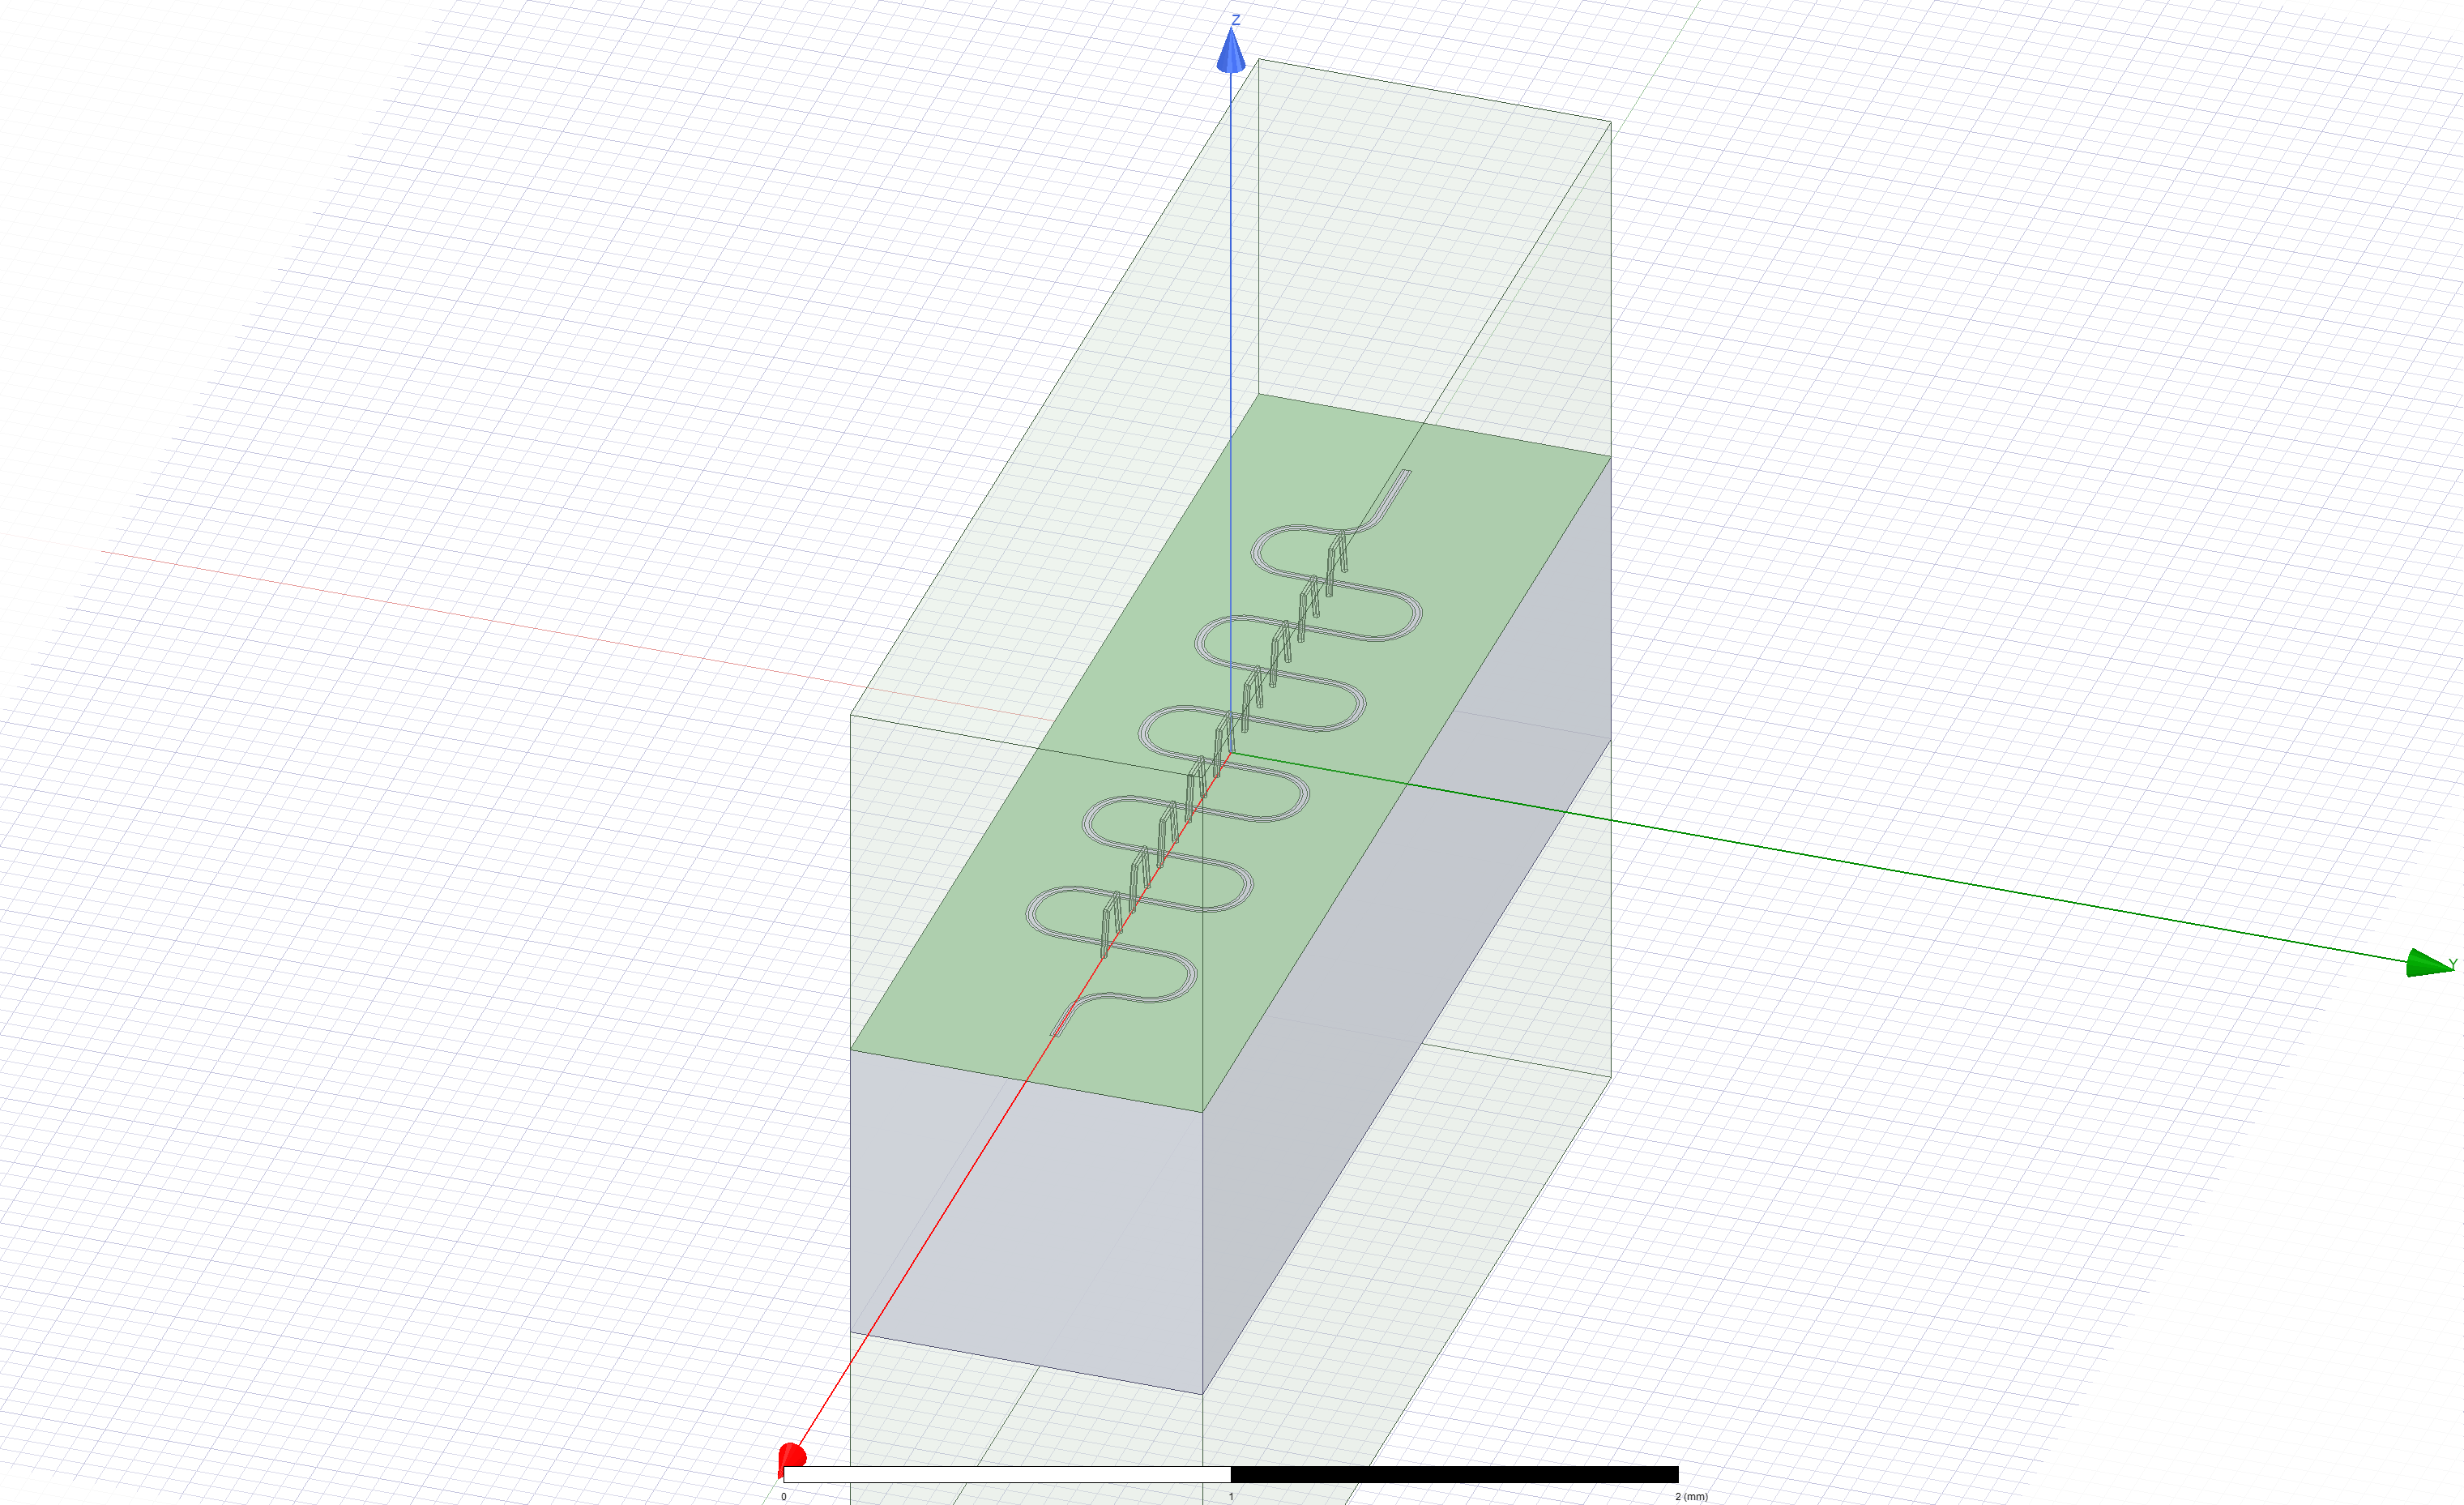

In [9]:
hfss.render_design(['short_to_ground','readout', 'open_to_ground'], [])
hfss.save_screenshot()

Set the convergence parameters and junction properties in the Ansys design. <br>
Then run the analysis and plot the convergence.

In [10]:
# Analysis properties
setup = hfss.pinfo.setup
setup.passes = 20
print(f"""
Number of eigenmodes to find             = {setup.n_modes}
Number of simulation passes              = {setup.passes}
Convergence freq max delta percent diff  = {setup.delta_f}
""")

pinfo = hfss.pinfo
pinfo.design.set_variable('Lj', '10 nH')
pinfo.design.set_variable('Cj', '0 fF')
setup.analyze()

hfss.plot_convergences()

INFO 01:41PM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 1
Number of simulation passes              = 20
Convergence freq max delta percent diff  = 0.1



01:43PM 06s INFO [hfss_report_f_convergence]: Saved convergences to C:\workspace\qiskit-metal\docs\tut\4 Analysis\hfss_eig_f_convergence.csv


Next, we change the length of the resonator and see how the eigen frequency changes.

In [11]:
rt_meander.options.total_length ='9 mm'

In [12]:
gui.rebuild()
gui.autoscale()

In [13]:
hfss.connect_ansys()
hfss.activate_eigenmode_design("Readout_1")

INFO 01:43PM [connect_project]: Connecting to Ansys Desktop API...
INFO 01:43PM [load_ansys_project]: 	Opened Ansys App
INFO 01:43PM [load_ansys_project]: 	Opened Ansys Desktop v2020.2.0
INFO 01:43PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Ansoft/
	Project:   Project16
INFO 01:43PM [connect_design]: 	Opened active design
	Design:    Readout [Solution type: Eigenmode]
INFO 01:43PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 01:43PM [connect]: 	Connected to project "Project16" and design "Readout" 😀 

01:43PM 08s WARNING [activate_eigenmode_design]: The name=Readout_1 was not in active project.  A new design will be inserted to the project.  Names in active project are: 
['Readout'].  
INFO 01:43PM [connect_design]: 	Opened active design
	Design:    Readout_1 [Solution type: Eigenmode]
WARNING 01:43PM [connect_setup]: 	No design setup detected.
WARNING 01:43PM [connect_setup]: 	Creating eigenmode default setup.
INFO 01:43PM [get_setup]:

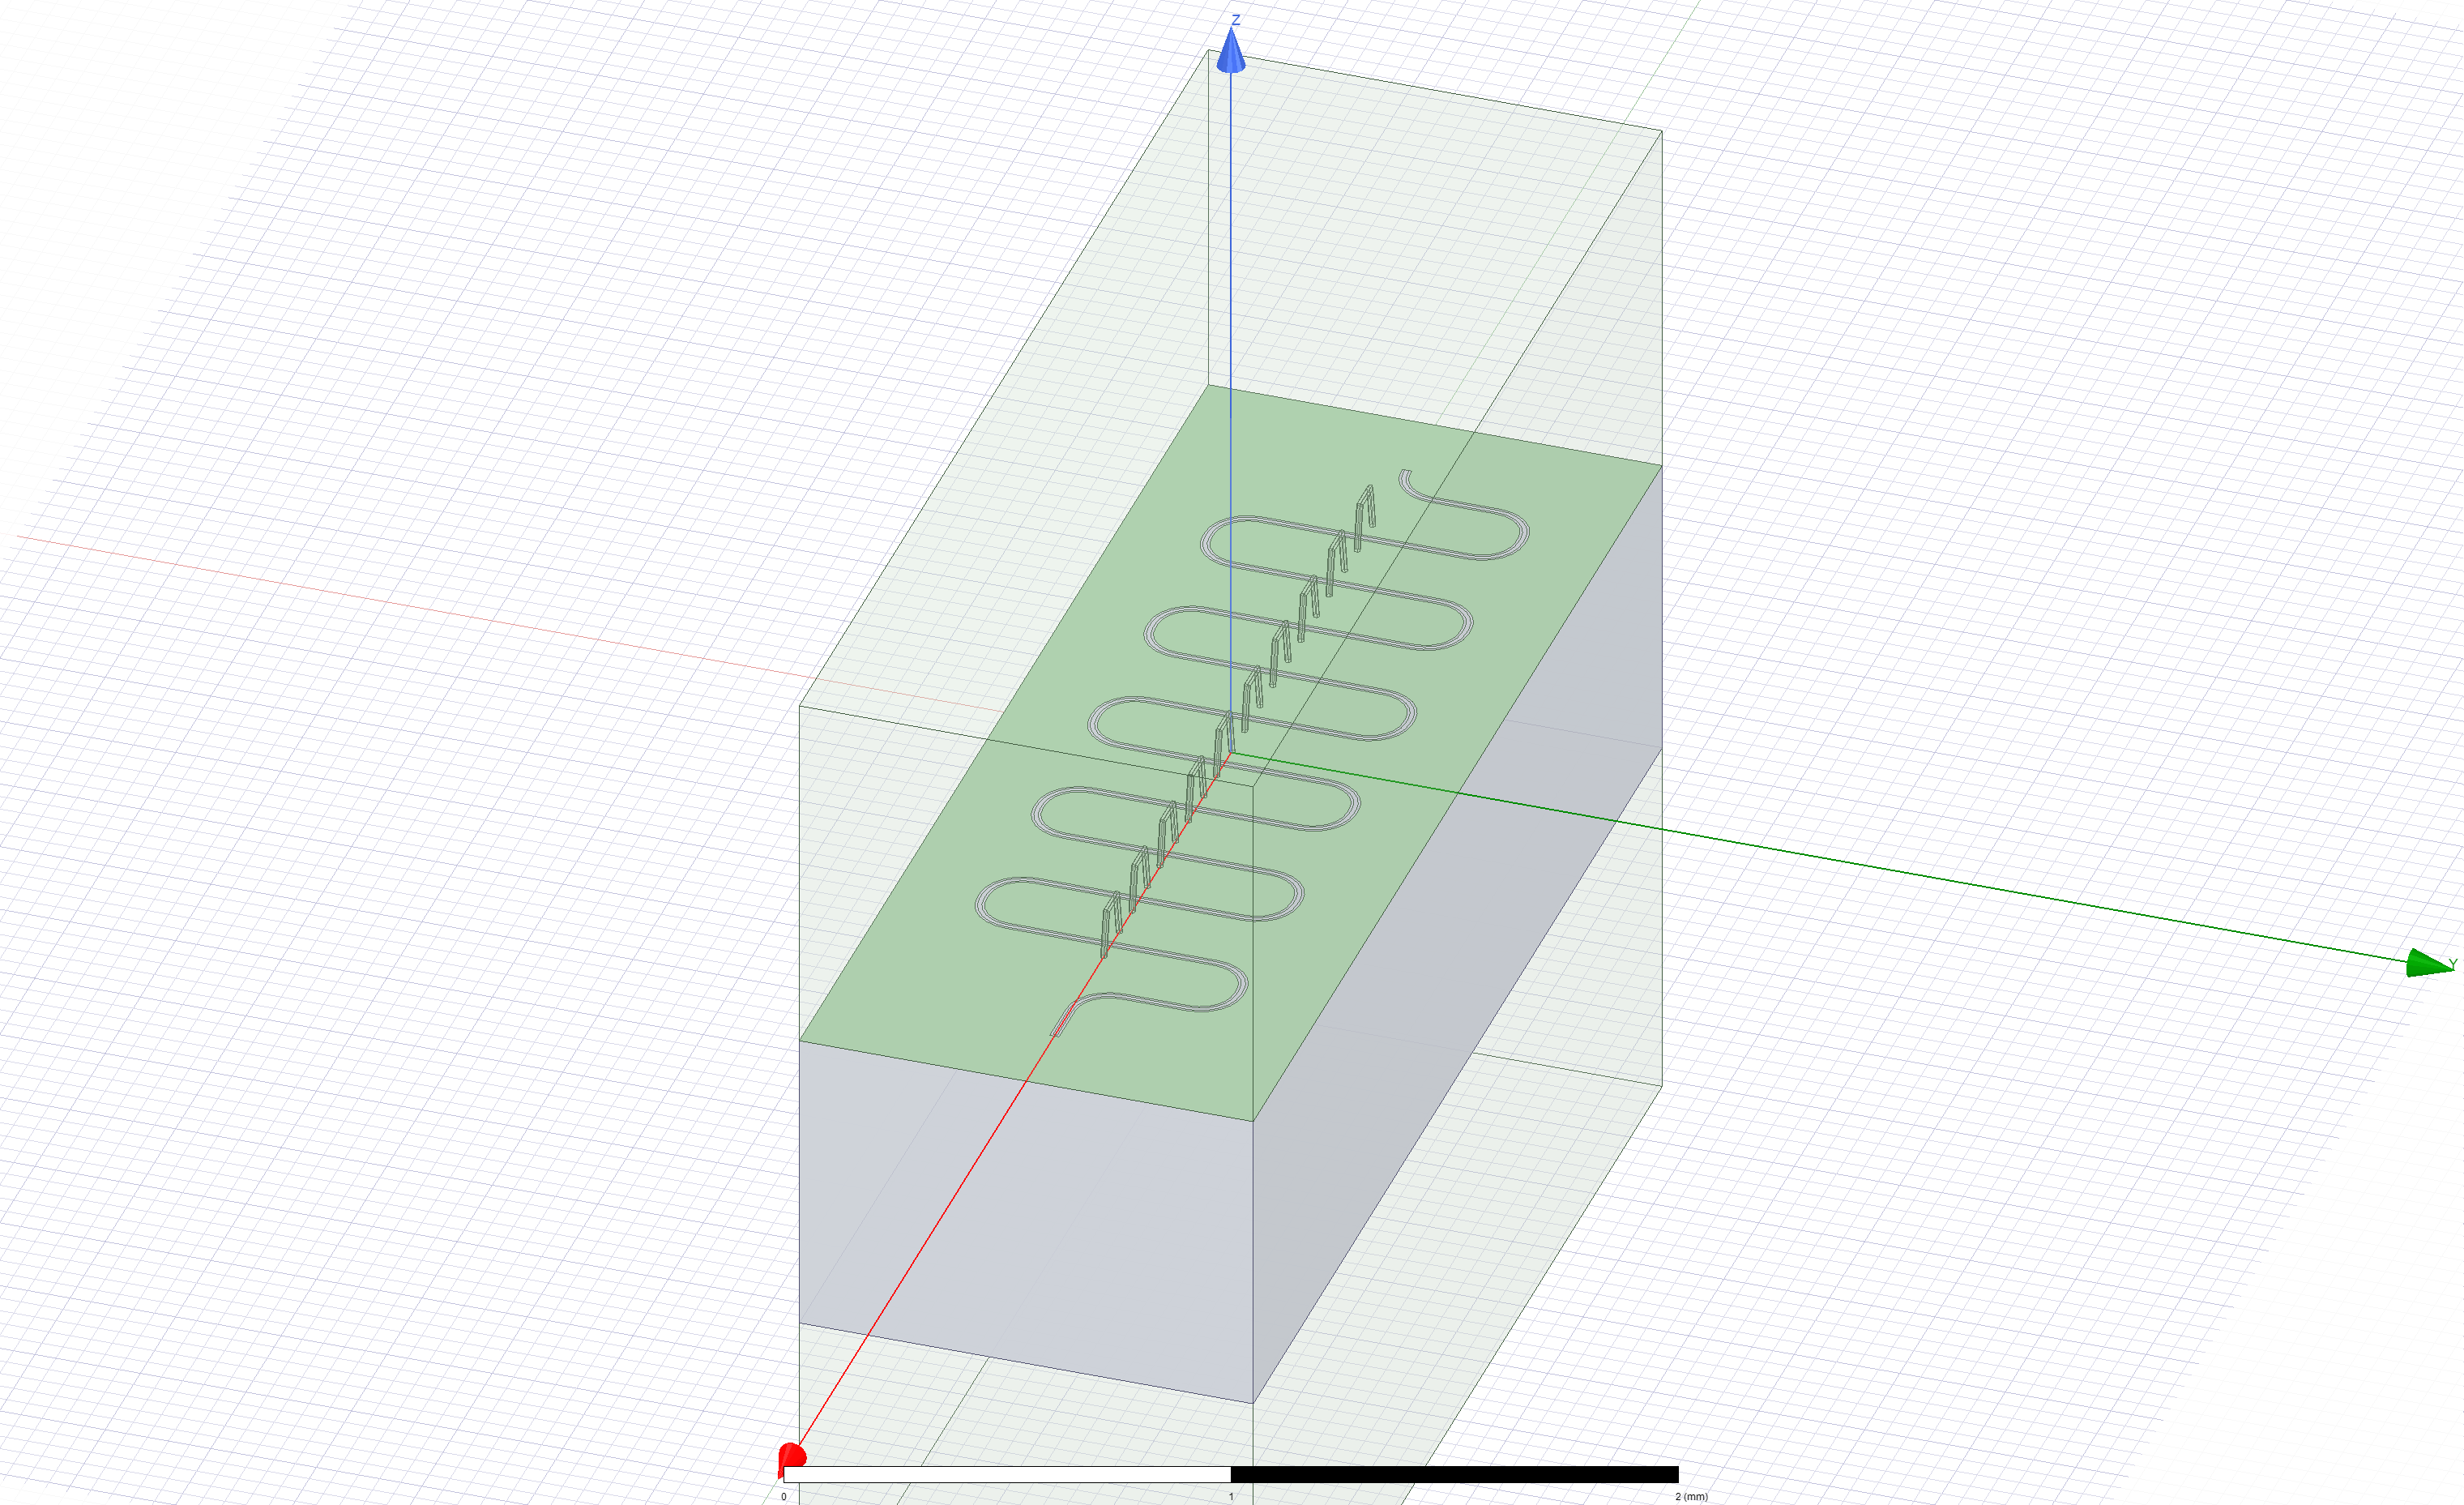

WindowsPath('C:/workspace/qiskit-metal/docs/tut/4 Analysis/ansys.png')

In [14]:
hfss.render_design(['short_to_ground','readout', 'open_to_ground'], [])
hfss.save_screenshot()

In [15]:
# Analysis properties
setup = hfss.pinfo.setup
setup.passes = 20
print(f"""
Number of eigenmodes to find             = {setup.n_modes}
Number of simulation passes              = {setup.passes}
Convergence freq max delta percent diff  = {setup.delta_f}
""")

pinfo = hfss.pinfo
pinfo.design.set_variable('Lj', '10 nH')
pinfo.design.set_variable('Cj', '0 fF')
setup.analyze()

hfss.plot_convergences()

INFO 01:43PM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 1
Number of simulation passes              = 20
Convergence freq max delta percent diff  = 0.1



01:45PM 26s INFO [hfss_report_f_convergence]: Saved convergences to C:\workspace\qiskit-metal\docs\tut\4 Analysis\hfss_eig_f_convergence.csv
INFO 01:45PM [__del__]: Disconnected from Ansys HFSS


From the above analyses we observe that for a total length of 6 mm for the resonator, the Eigen Frequency was close to 9.8 GHz. However, for a total length of 9 mm, this frequency is close to 3.3 GHz. Similar analysis can be performed by the user for matching a particular frequency of interest.

### Plot fields and display them
Display the Ansys modeler window and plot the E-field on the chip's surface.

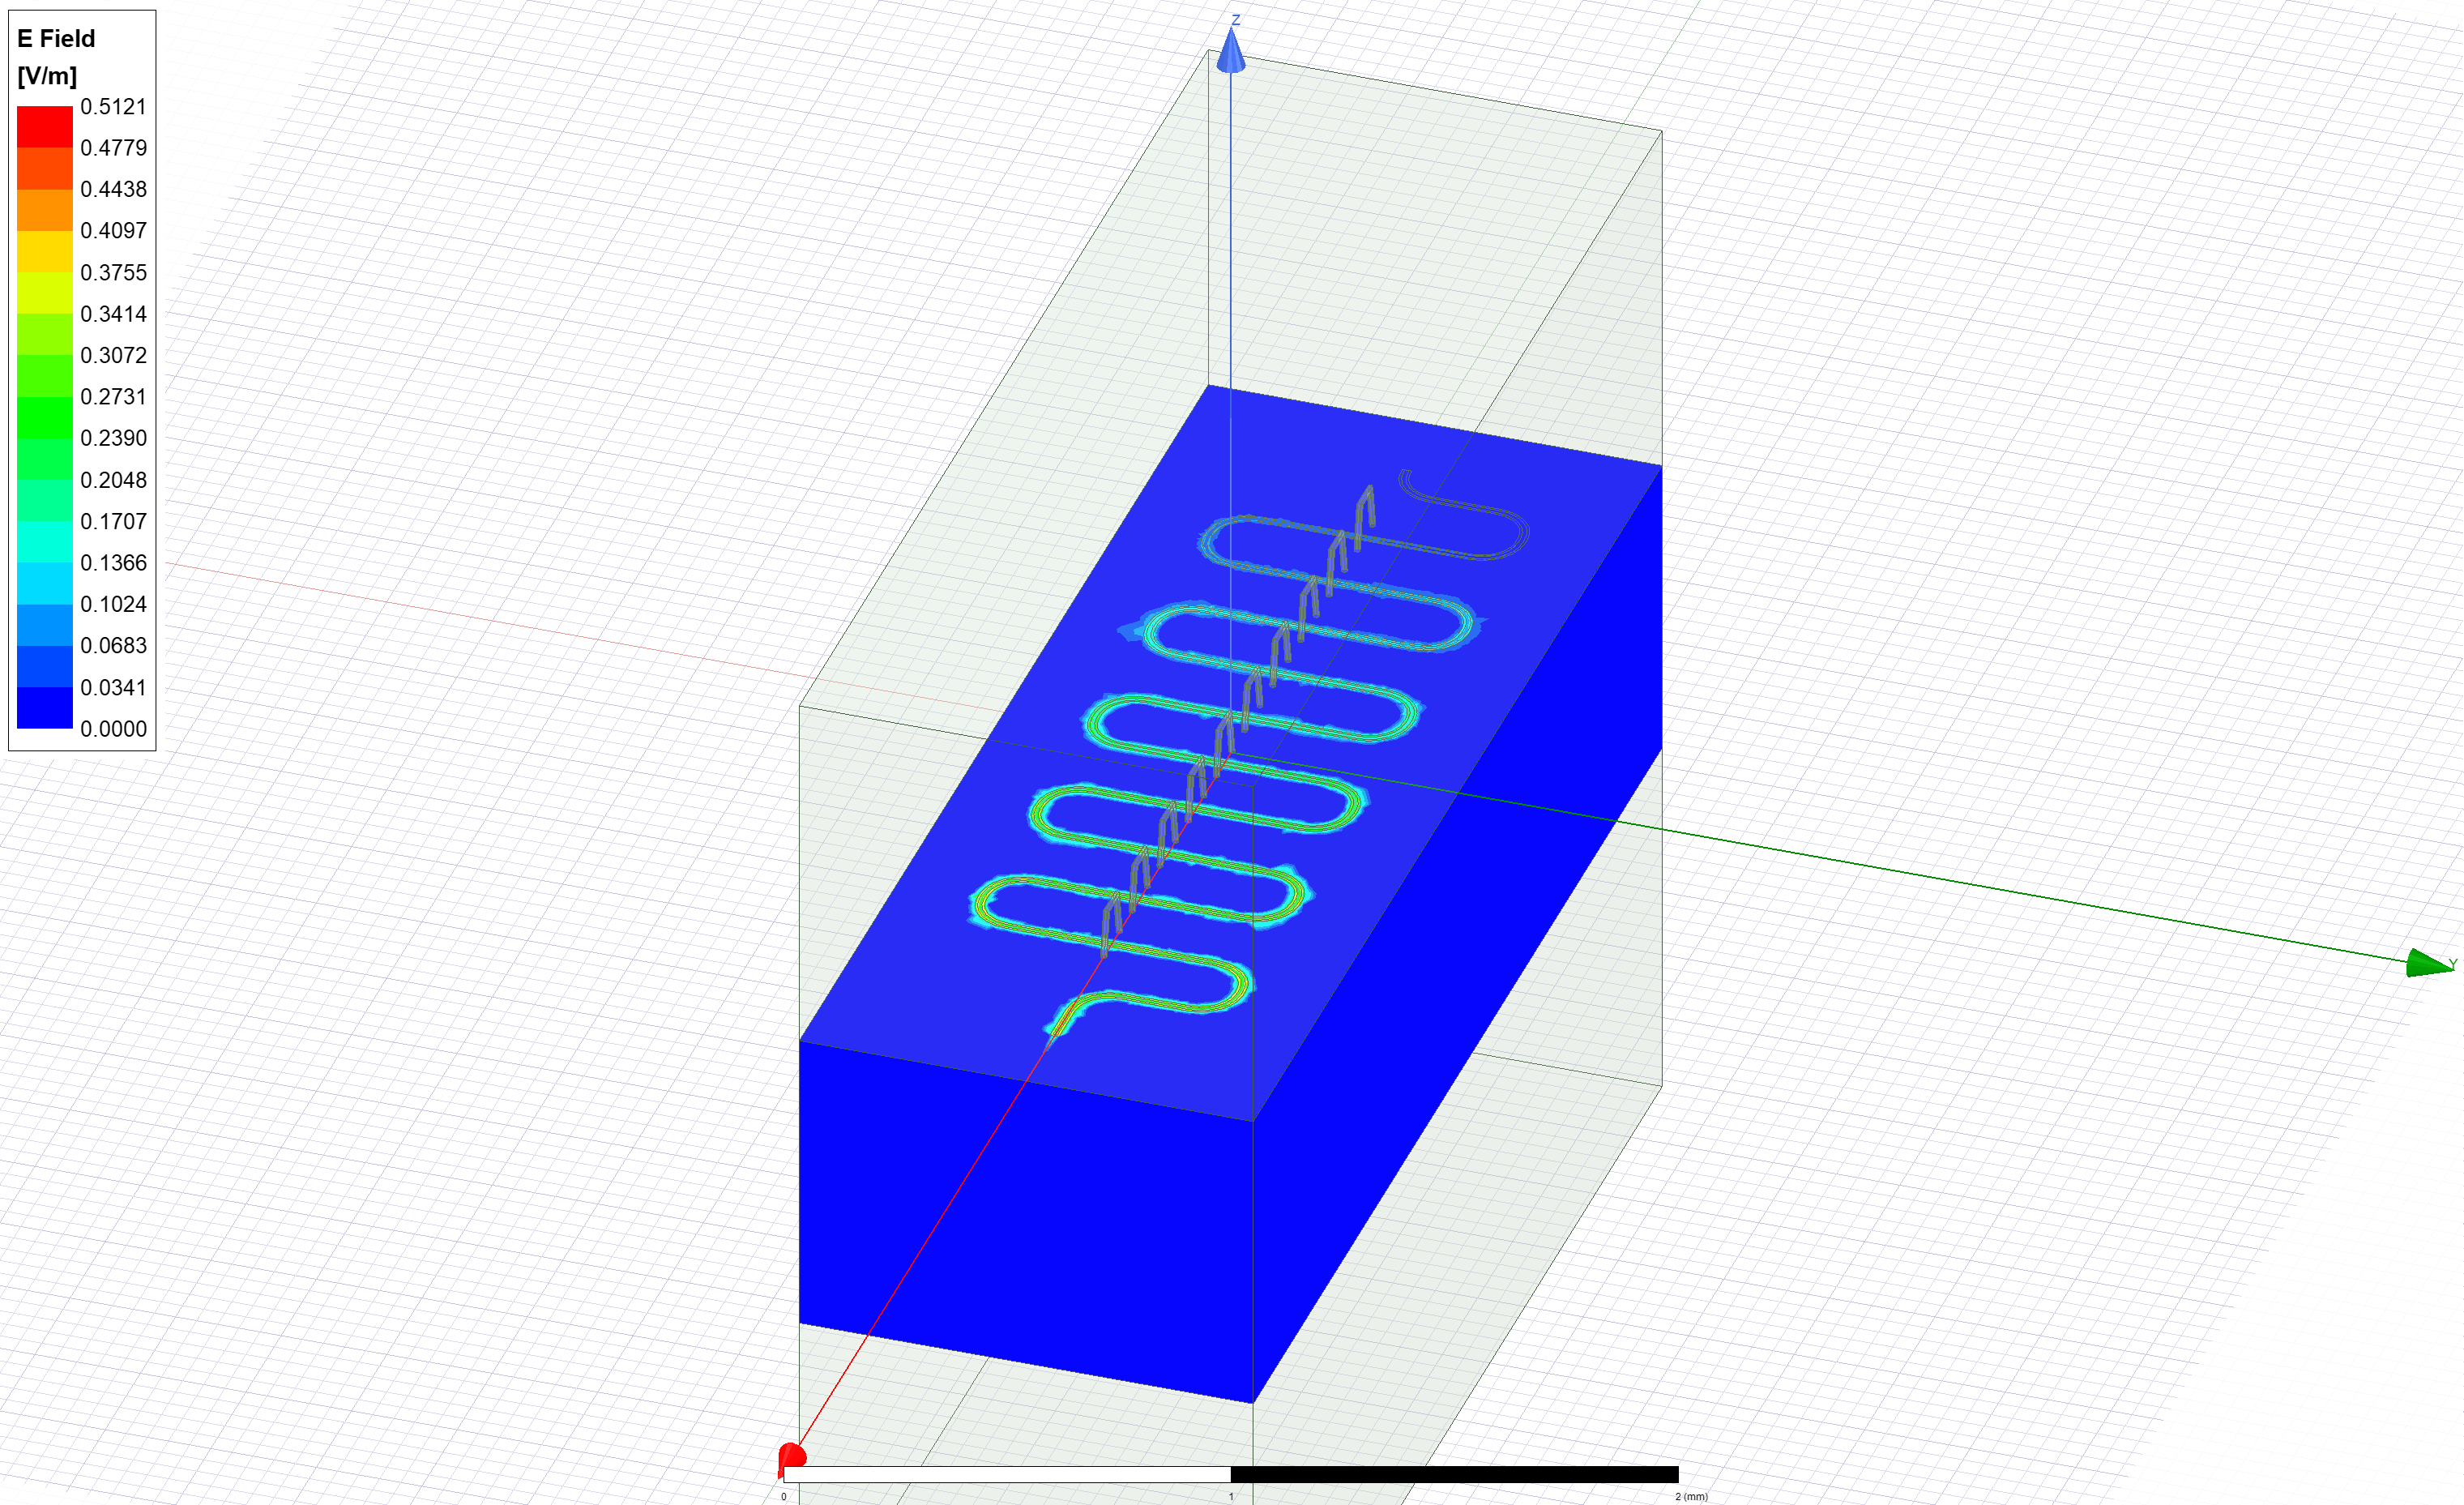

WindowsPath('C:/workspace/qiskit-metal/docs/tut/4 Analysis/ansys.png')

In [16]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_ansys_fields('main')
hfss.save_screenshot()

Delete the newly created E-field plot to prepare for the next phase.

In [17]:
hfss.plot_ansys_delete(['Mag_E1'])

In [18]:
%metal_print Energy-Participation-Ratio Analysis

Find the electric and magnetic energy stored in the substrate and the system as a whole.

In [19]:
# Handles  microwave analysis on eigenmode solutions
eprd = epr.DistributedAnalysis(pinfo)

Design "Readout_1" info:
	# eigenmodes    1
	# variations    1


In [20]:
ℰ_elec = eprd.calc_energy_electric()
ℰ_elec_substrate = eprd.calc_energy_electric(None, 'main')
ℰ_mag = eprd.calc_energy_magnetic()

print(f"""
ℰ_elec_all       = {ℰ_elec}
ℰ_elec_substrate = {ℰ_elec_substrate}
EPR of substrate = {ℰ_elec_substrate / ℰ_elec * 100 :.1f}%

ℰ_mag    = {ℰ_mag}
""")


ℰ_elec_all       = 4.15624846946662e-24
ℰ_elec_substrate = 3.78016656502688e-24
EPR of substrate = 91.0%

ℰ_mag    = 4.15625817565646e-24



Release Ansys session

In [21]:
hfss.disconnect_ansys()

In [22]:
gui.main_window.close()

True